In [256]:
%%html

<h3>Chapter 2 -</h3> 
<a href='https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb'>https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb</a>

In [350]:
%%html
<h3>Getting the data</h3>

In [351]:
# Data downloading
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
            
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()


In [352]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [353]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [354]:
# Get the count of each category in a column
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

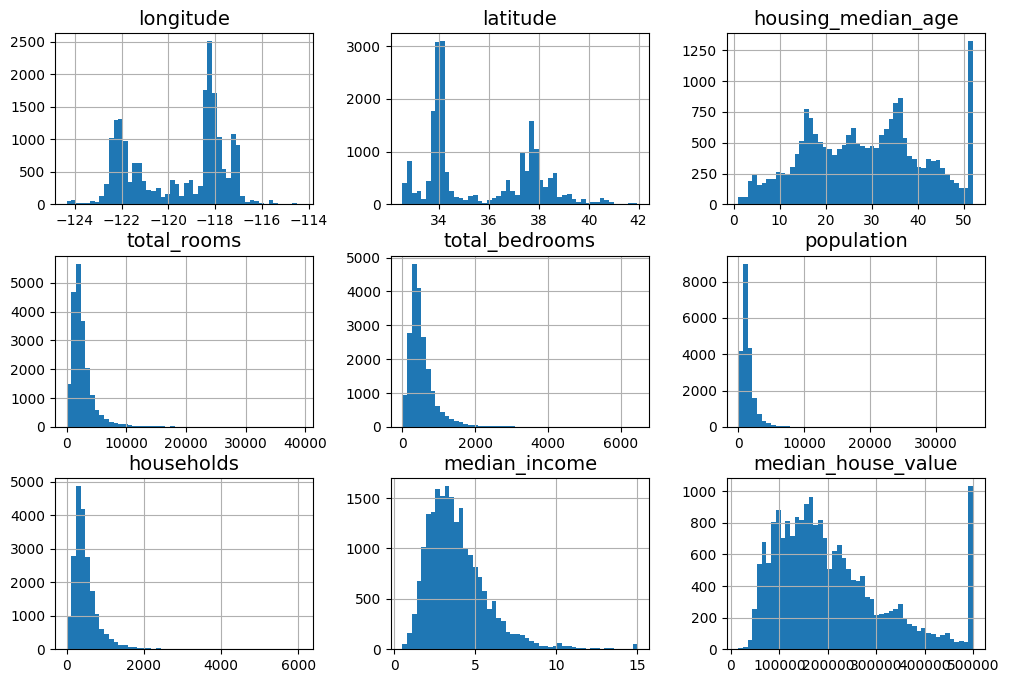

In [355]:
import matplotlib.pyplot as plt
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [356]:
# We need an efficeine train test split method. 
# Random based split is not efficient as test data can in the training set over multiple run time.
# It will affect the performance of the model in unseen data
# Sklearn has the method to use train_test_split method

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # random_state allows you to set the random generator seed.
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,99500.0,INLAND
16623,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,184100.0,NEAR BAY
18086,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,79400.0,INLAND
2144,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,490800.0,<1H OCEAN


[]

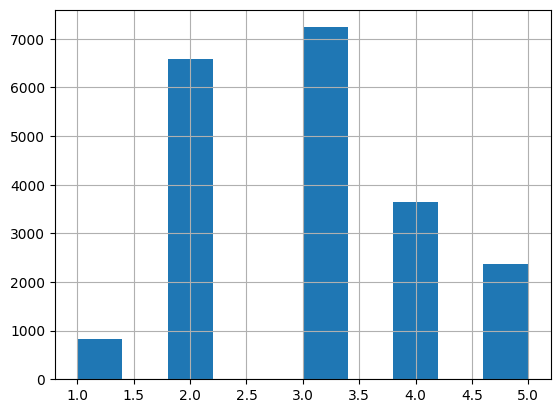

In [357]:
# Suppose median_income is the important attribute to predict, we need to ensure that the test set is is represntative of various
# categories of incomes in the whole dataset. As the median income is a continous numerical attribute, 
# we need to create income category atribure
import numpy as np

housing['income_cat'] = pd.cut(housing['median_income'], [0, 1.5, 3., 4.5, 6., np.inf], labels=[1,2,3,4,5])
housing['income_cat'].hist().plot()

In [358]:
# Stratified splitting refers to a technique used when dividing your data into training and validation sets. 
# It ensures that the proportions of classes are preserved in each split. 
# In simpler terms, it maintains the same class mix in both the training and validation sets it creates.

# Stratified splitting becomes crucial when dealing with class imbalance. 
# Imagine a scenario where your training data has class A at 10% and class B at 90%. 
# A regular split might isolate all of class A in the training set, leaving the test set with none. 
# This would cripple the model's ability to learn from the minority class.

strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['income_cat'])
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN,3


In [359]:
housing['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

In [360]:
# Droping the income_cat
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [361]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

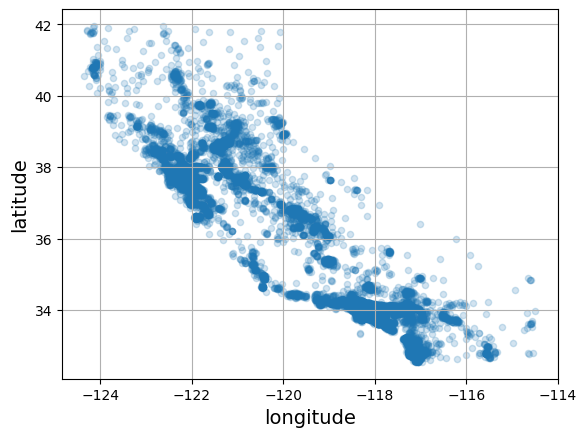

In [362]:
housing.plot(kind='scatter',x='longitude', y='latitude', grid=True, alpha=0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

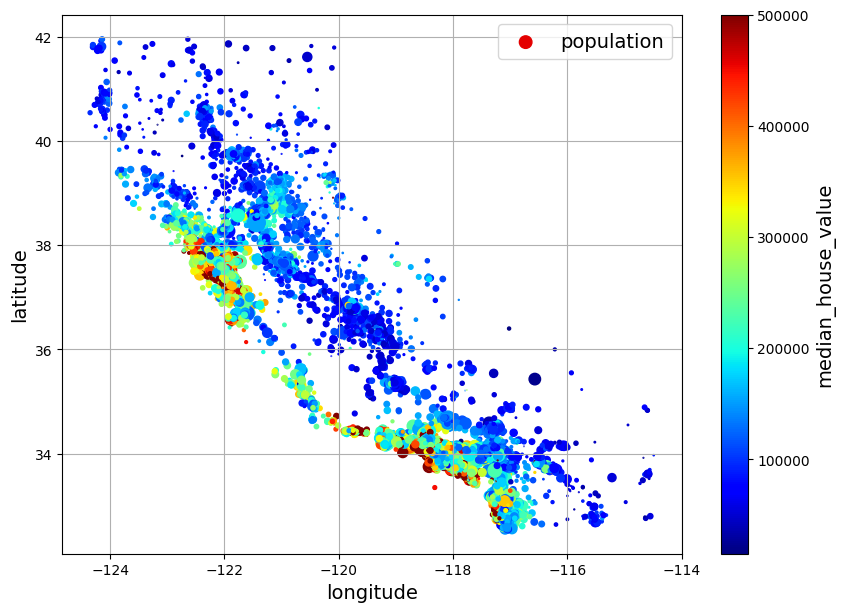

In [363]:
# We need to plot a graph that shows the house prices related to the location and to the population density 
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

In [364]:
# Correlation

corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


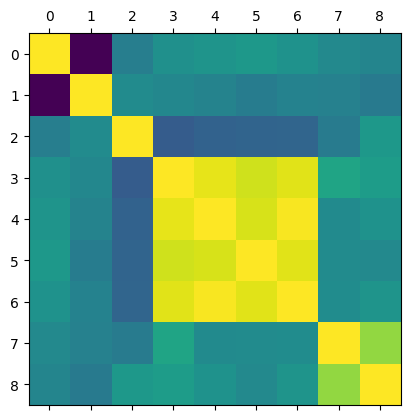

In [365]:
import matplotlib.pyplot as plt

plt.matshow(corr_matrix)
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

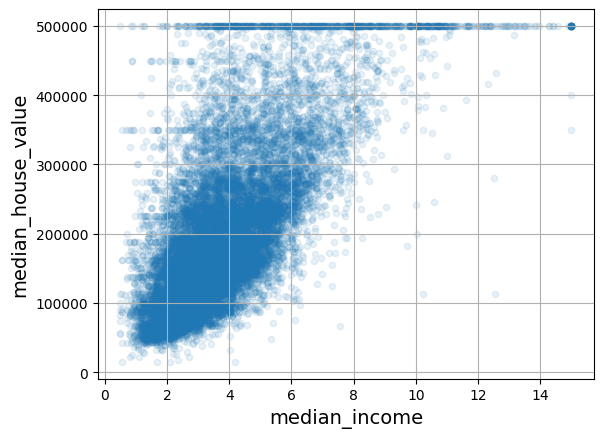

In [366]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)

In [367]:
%%html
<h3>Prepare the Data for Machine Learning Algorithms</h3>

In [368]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [369]:
#housing = strat_train_set.drop("median_house_value", axis=1)

In [370]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [371]:
#housing_labels = strat_train_set["median_house_value"]
#housing_labels

In [372]:
%%html
<h4>First step: Clean the Data ->strategy for missing values</h4>

In [373]:
# How to work with mixing features. For example, total_bedrooms feature
# 1. Get rid of the entire row which has missing value in the total_bedrooms column
# 2. Get rid of the whole feature (column) -> drop total_bedrooms
# 3. Set the the missing value (Zero, the mean, the median, etc.). This is called imputation.

# Option 1
housing.dropna(subset=["total_bedrooms"], inplace=True)
housing

# Option 2
#housing.drop("total_bedrooms", axis=1)
#housing

# Option 3
#median = housing["total_bedrooms"].median()
#housing["total_bedrooms"].fillna(median, inplace=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


In [374]:
# For the option 3, we can use handy scikit-learn class: SimpleImputer
# It helps to store the median value of each feature, ehich could be useful for not only training set, validation set, test set, 
# and any new data fed to the model.

# For example, we want to replace each feature's missing value with the median of that feature. 
# There are other imputers as well KNNImputer or IterativeImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# As the median can be calculated only on numerical features, we need to specify that below
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

# Now we can use the trained imputer to transform the training set
X = imputer.transform(housing_num)

# The output of X is Numpy array which has no column names
# We can do this by 
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index= housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0


In [375]:
housing_labels = housing["median_house_value"]
housing = housing.drop("median_house_value", axis=1)

In [376]:
%%html
<h4>Handling Text and Categorical Attributes/Features</h4>

In [377]:
housing_cat = housing[['ocean_proximity']] # It is categorical feature. ML prefer to work with numerical data.

# There are two approaches in Scikit-learn/ML
# 1. providing an ID for each unique values in the feature.  This can be done with OrdinalEncoder  

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [378]:
# The one issue with this representation is that it does not contain the semantic meaning. 
# So ML algorithm may assume that two nearby values are more similar than two distant values.

# The commo approach is one-hot encoding which gives one for the corresponding category values and zero for the the rest of the category values in each row.
# It can be considered as a higher dimension representation of the category values compared to earlier approach and it is some what capturing the semantics
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
housing_cat_encoded = onehot_encoder.fit_transform(housing_cat)


In [379]:
# By default, the OneHotEncoder class returns a sparse array(it's an efficent representation of matric that mostly contains zeros to save the memeory), 
# but we can convert it to a dense array if needed by calling the toarray() method
housing_cat_encoded.toarray()

# Alternatively, you can set sparse_output=False when creating the OneHotEncoder -> onehot_encoder = OneHotEncoder(sparse_output=False)
# (note: the sparse hyperparameter was renamned to sparse_output in Scikit-Learn 1.2):

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [380]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [381]:
# Pandas has also a function called get_dummies which does the one hot encoding and convert the category values into one hot representation.
pd.get_dummies(housing_cat)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,False,False,False,True,False
14973,True,False,False,False,False
3785,False,True,False,False,False
14689,False,True,False,False,False
20507,False,False,False,False,True
...,...,...,...,...,...
14207,True,False,False,False,False
13105,False,True,False,False,False
19301,False,False,False,False,True
19121,True,False,False,False,False


In [382]:
# Advantage of the one hot encoder over pandad dummies is that it remebers which categories it was trained on. 
# It is important in production because we can feed exactly same features as during the training

In [383]:
%%html
<h4>Feature scaling and transformation</h4>

In [384]:
# As with above concepts, fit() and fit_transform methods apply to training_data only. During the inference we use transform() only

In [385]:
# There are two approach in feature scaling min-max scaling and standardization
# min-max scales the data ranging between minimum to maximumvalue we define

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
housing_num_min_max_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.61433638,
        -0.7794789 ,  0.82803782],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.86708979,
        -0.22929339,  0.93319203],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.92458466,
        -0.73336919, -0.64247158],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.71663244,
        -0.50873781, -0.44824557],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.68751167,
        -0.49716556,  1.        ],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.92122457,
        -0.61608805, -0.0997934 ]])

In [386]:
# Standardization is done by subtracting the value with mean and diving it with SD. 
# It's less affected by ouliers, however it wont restrict the values between certain ranges.

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled =  std_scaler.fit_transform(housing_num)
housing_num_std_scaled

array([[-1.42263435,  1.01312356,  1.86068722, ...,  1.395732  ,
        -0.93755681,  2.18348662],
       [ 0.5966805 , -0.70227426,  0.90752642, ..., -0.3735368 ,
         1.1713802 ,  2.40453279],
       [-1.20270897,  1.2755888 ,  0.35151595, ..., -0.77599971,
        -0.76081193, -0.90769246],
       ...,
       [ 1.25645664, -1.42874055, -1.23708538, ...,  0.67966161,
         0.10023117, -0.49940717],
       [ 0.58668389, -0.73976929,  0.66923622, ...,  0.88350647,
         0.14458922,  2.5449708 ],
       [-1.41763605,  0.94750725,  1.22524669, ..., -0.75247915,
        -0.31125713,  0.23307918]])

In [387]:
# As we are transfoming th edata, # we need to reverse the transformation to get the actual values
#target_scaler = StandardScaler()
#...
#...
# scaled_predictions = model.predict(some_new_data)
# predictions = traget_scaler.inverse_transform(scaled_predictions)

In [388]:
%%html
<h4>Custom Transformers</h4>

In [389]:
# We can create a basic custom transformer using the function transformer. 
# For replacing heavy-tailed distribution with its logarithm, we can use the function transformer.
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp) # Inverse function is optional here
log_transformer.transform(housing['population'])

# It's obvious that we can pass lambda function to the function transformer
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [390]:
# If we would like to tranformer to be trainable: learning some parameter in the fit() and use them later in the transform() just like other standard tranformers,
# We nee to write a custom class
#TransformerMixin paraent class brings the fir_transform method so we do not need to specifically write here

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean=True

    def fit(self, X, y=None):
        X = check_array(X) # check for the finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_= X.std(axis=0)
        self.n_feature_in_ = X.shape[1] # Every estimator stores in this fit()
        return self # always return self

    def transform(self, X):
        check_is_fitted(self) # Look for learned attributes (with trailing_)
        X = check_array(X)
        assert self.n_feature_in_ == X.shape[1]
        if self.with_mean:
            X = X-self.mean_
            
        return X/self.scale_


standard_scaler_clone = StandardScalerClone()
scaled = standard_scaler_clone.fit_transform(housing_num)

# The above return the Numpy array, if we want to see in nice pandas format, do the following
df_test = pd.DataFrame(scaled, columns=housing_num.columns)
df_test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.422634,1.013124,1.860687,0.310661,1.359094,0.137572,1.395732,-0.937557,2.183487
1,0.596681,-0.702274,0.907526,-0.308789,-0.436356,-0.693276,-0.373537,1.171380,2.404533
2,-1.202709,1.275589,0.351516,-0.711706,-0.759584,-0.788231,-0.776000,-0.760812,-0.907692
3,1.231465,-0.885063,-0.919365,0.700329,0.736231,0.383175,0.731930,-0.851326,-0.956236
4,0.711641,-0.875689,0.589806,0.788039,1.585590,0.444347,1.756381,-0.181249,1.346979
...,...,...,...,...,...,...,...,...,...
16339,0.586684,-0.833507,0.986956,-0.184534,0.136961,-0.444935,0.060287,0.443306,2.544971
16340,0.131838,0.319465,-0.442785,0.138896,0.125165,-0.005772,0.083807,-0.686635,-1.019516
16341,1.256457,-1.428741,-1.237085,0.584297,0.556922,1.267892,0.679662,0.100231,-0.499407
16342,0.586684,-0.739769,0.669236,0.520799,0.788136,0.273612,0.883506,0.144589,2.544971


In [391]:
%%html
<h4>Transformation Pipelines</h4>

In [392]:
# Scikit-learn provides the pipeline class to help with the sequence of transformations, mainly for numerical data.

from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

housing_num_prepared = num_pipeline.fit_transform(housing_num)
df_test = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index = housing_num.index)
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13096,-1.422634,1.013124,1.860687,0.310661,1.359094,0.137572,1.395732,-0.937557,2.183487
14973,0.596681,-0.702274,0.907526,-0.308789,-0.436356,-0.693276,-0.373537,1.171380,2.404533
3785,-1.202709,1.275589,0.351516,-0.711706,-0.759584,-0.788231,-0.776000,-0.760812,-0.907692
14689,1.231465,-0.885063,-0.919365,0.700329,0.736231,0.383175,0.731930,-0.851326,-0.956236
20507,0.711641,-0.875689,0.589806,0.788039,1.585590,0.444347,1.756381,-0.181249,1.346979
...,...,...,...,...,...,...,...,...,...
14207,0.586684,-0.833507,0.986956,-0.184534,0.136961,-0.444935,0.060287,0.443306,2.544971
13105,0.131838,0.319465,-0.442785,0.138896,0.125165,-0.005772,0.083807,-0.686635,-1.019516
19301,1.256457,-1.428741,-1.237085,0.584297,0.556922,1.267892,0.679662,0.100231,-0.499407
19121,0.586684,-0.739769,0.669236,0.520799,0.788136,0.273612,0.883506,0.144589,2.544971


In [393]:
# So far we've dealt with numerical & categorical features separately. We can combine them using the ColumnTransformer class 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoding", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

housing_prepared = preprocessing.fit_transform(housing)
df_test = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index = housing.index)
df_test

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
13096,-1.422634,1.013124,1.860687,0.310661,1.359094,0.137572,1.395732,-0.937557,0.0,0.0,0.0,1.0,0.0
14973,0.596681,-0.702274,0.907526,-0.308789,-0.436356,-0.693276,-0.373537,1.171380,1.0,0.0,0.0,0.0,0.0
3785,-1.202709,1.275589,0.351516,-0.711706,-0.759584,-0.788231,-0.776000,-0.760812,0.0,1.0,0.0,0.0,0.0
14689,1.231465,-0.885063,-0.919365,0.700329,0.736231,0.383175,0.731930,-0.851326,0.0,1.0,0.0,0.0,0.0
20507,0.711641,-0.875689,0.589806,0.788039,1.585590,0.444347,1.756381,-0.181249,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.586684,-0.833507,0.986956,-0.184534,0.136961,-0.444935,0.060287,0.443306,1.0,0.0,0.0,0.0,0.0
13105,0.131838,0.319465,-0.442785,0.138896,0.125165,-0.005772,0.083807,-0.686635,0.0,1.0,0.0,0.0,0.0
19301,1.256457,-1.428741,-1.237085,0.584297,0.556922,1.267892,0.679662,0.100231,0.0,0.0,0.0,0.0,1.0
19121,0.586684,-0.739769,0.669236,0.520799,0.788136,0.273612,0.883506,0.144589,1.0,0.0,0.0,0.0,0.0


In [394]:
%%html
<h3>Select & train a model</h3>

In [395]:
%%html
<h4>Train & evaluate on th training set</h4>

In [396]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# The below from above
#-----------------------------
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])
cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoding", OneHotEncoder(handle_unknown="ignore"))
])
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])
#-----------------------------

# Add the linear regression to the pipeline 
lin_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('linear_regression',LinearRegression())
])

lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('linear_regression', LinearRegression())])

In [397]:
housing_prediction = lin_reg.predict(housing)

In [398]:
# We can measure the performance of the regression model using RMSE
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_prediction, squared=False)
lin_rmse

68164.26648432278

In [399]:
# We can do the same with Decision Tree
from sklearn.tree import DecisionTreeRegressor

# The below from above
#-----------------------------
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])
cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoding", OneHotEncoder(handle_unknown="ignore"))
])
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])
#-----------------------------

# Add the linear regression to the pipeline 
tree_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('decision_tree_regressor',DecisionTreeRegressor(random_state=42))
])
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('decision_tree_regressor',
                 DecisionTreeRegressor(random_state=42))])

In [400]:
# We can measure the performance of the regression model using RMSE
from sklearn.metrics import mean_squared_error
housing_prediction = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_prediction, squared=False)
tree_rmse

0.0

In [401]:
%%html
<h4>Better evaluation using cross validation</h4>

In [402]:
%%html
We can better evaluate the model using k fold cross validation. In this, training set is randomly splits into 10 nooverlpaping folds is k=10.
Then it train & evalaute the decision tree model 10 times, picking a different fold for evaluation every time and using the other 9 folds for training. 
The result is an array containing the 10 evaluation scores.
<img src='images/cross_validation.png'/>


In [403]:
from sklearn.model_selection import cross_val_score
tree_rmse = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
tree_rmse

array([66833.36784886, 66671.06073382, 69343.76456786, 71211.85174384,
       67506.7701663 , 68537.31655908, 69359.05076258, 67261.3430004 ,
       69010.36914296, 66560.37421548])

In [404]:
%%html
<h3>Finetune the model</h3>

In [415]:
# Normally we need to manually tune the hyperparameters to get the best fit model. Scikit-learn provides tuning methods along with cross-validation: Grid search cv and randomized search cv

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

#-----------------------------
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])
cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoding", OneHotEncoder(handle_unknown="ignore"))
])
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])
#-----------------------------

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42))
])

# Hyperparameters of random_forest: search space has only two items
param_grid = [
    {'random_forest__max_features': [4, 6, 8]}
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot_encoding',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['ocean_proximity'])])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [4, 6, 8]}],
             scoring='neg_root_mean_squared_error')

In [414]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42))
])

param_distribs = {'random_forest__max_features': randint(low=2, high=4)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=1, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardize',
                                                                                                StandardScaler())]),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('impu...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('one_hot_encoding',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['ocean_proximity'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=1,
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1bbbb6b810>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [416]:
%%html
<h3>Analysing the best models and their errors</h3>

In [422]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances

array([0.12674556, 0.11606147, 0.05288202, 0.06807143, 0.04783763,
       0.0662664 , 0.04666522, 0.31583314, 0.0320965 , 0.10521256,
       0.00033043, 0.00853395, 0.01346372])

In [423]:
sorted(zip(feature_importances, final_model['preprocessing'].get_feature_names_out()), reverse=True)

[(0.31583313523157347, 'num__median_income'),
 (0.12674555913404528, 'num__longitude'),
 (0.1160614674143386, 'num__latitude'),
 (0.10521255581323362, 'cat__ocean_proximity_INLAND'),
 (0.06807142508274623, 'num__total_rooms'),
 (0.06626640178762716, 'num__population'),
 (0.05288201697394901, 'num__housing_median_age'),
 (0.04783762773763548, 'num__total_bedrooms'),
 (0.04666521926927366, 'num__households'),
 (0.03209650349397821, 'cat__ocean_proximity_<1H OCEAN'),
 (0.013463715598559977, 'cat__ocean_proximity_NEAR OCEAN'),
 (0.008533946017227591, 'cat__ocean_proximity_NEAR BAY'),
 (0.00033042644581178575, 'cat__ocean_proximity_ISLAND')]

In [424]:
%%html
<h3>Evaluate your system on the test set</h3>

In [425]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

51489.62029333421


In [426]:
%%html
<h3>Model persistence using joblib</h3>

In [428]:
import joblib
# Save the final model
joblib.dump(final_model, "my_california_housing_model.pkl")

# Load the saved model
final_model_reloaded = joblib.load("my_california_housing_model.pkl")

In [429]:
# pg. no.103